In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [35]:
distr_func = np.asarray([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

In [3]:
#Функция, строящая сл.в. со знач 0,...,9 и весами из массива distr_func
def discr_rng(distr_func):
    x=np.random.rand()
    distr_func = distr_func/distr_func.sum()
    distr_func = np.insert(distr_func, 0, 0)
    for i in range(1,10):
        distr_func[i]=distr_func[i-1]+distr_func[i]
    for i in range(10):
        if (x>=distr_func[i]) & (x<distr_func[i+1]):
            y=i
            break
    return i

In [4]:
random_discr = [discr_rng(distr_func) for i in range(1000)]

In [36]:
%%time
random_discr = [discr_rng(distr_func) for i in range(1000)]

Wall time: 42 ms


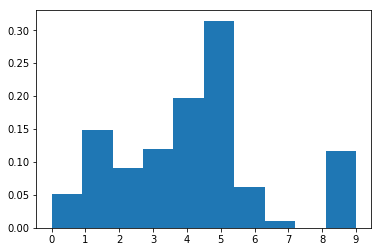

In [6]:
plt.hist(random_discr, density=True, bins=10)
plt.xticks(range(10))
plt.show()

In [55]:
distr_func.sort()
distr_func1 = distr_func[::-1]

In [56]:
%%time
random_discr1 = [discr_rng(distr_func1) for i in range(1000)]

Wall time: 44 ms


### Смделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

In [9]:
def exp_distr(lambd):
    x = np.random.rand()
    return (-1/lambd)*np.log(1-x)

In [10]:
random_exp = [exp_distr(0.5) for i in range(1000)]

In [11]:
def plot_exp_distr(lambd):
    x = np.linspace(0, 14, 1024, endpoint=True)
    exp_distr_x = lambd*np.exp(-lambd*x)
    plt.plot(x, exp_distr_x, color='black')
    plt.title('Exp distribution, lambda = %f'%lambd)

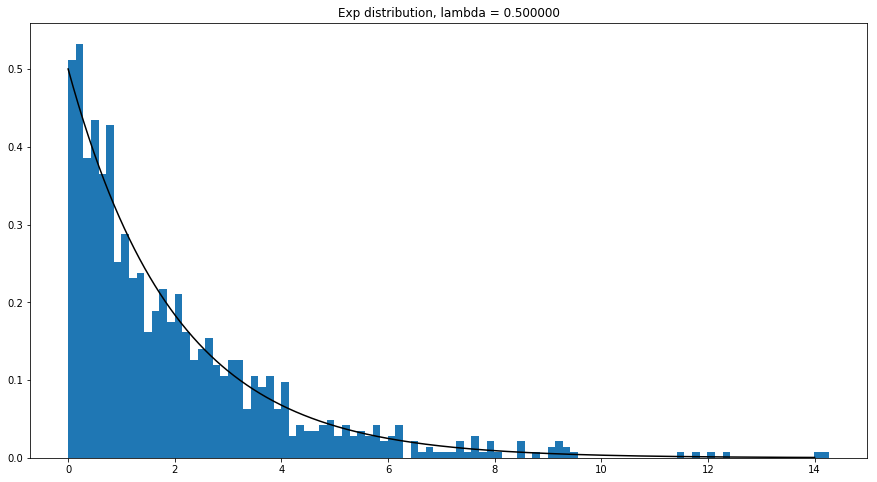

In [12]:
plt.figure(figsize=(15,8))
plt.hist(random_exp, density=True, bins = 100)
plot_exp_distr(0.5)
plt.show()

### Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

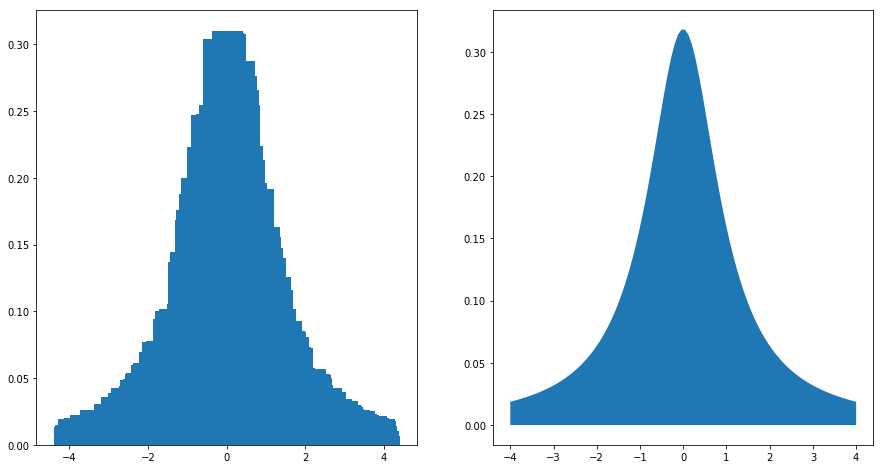

In [13]:
from scipy import stats
dist = stats.cauchy()

r_x = [8*np.random.rand()-4 for i in range(1000)]
r_y = []
for i in range(1000):
    while len(r_y)<i+1:
        y = dist.pdf(0)*np.random.rand()
        if y <= dist.pdf(r_x[i]):
            r_y.append(y)
            
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.bar(r_x, r_y)

plt.subplot(1,2,2)
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x))
plt.show()

Примерно похоже

### Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

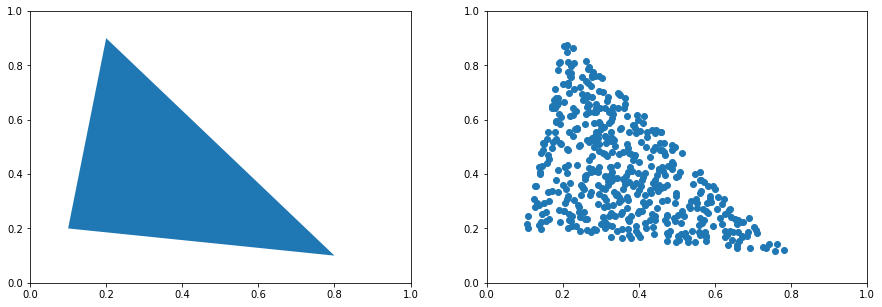

In [14]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))

x_tr, y_tr = np.asarray([np.random.rand() for i in range(500)]), np.asarray([np.random.rand() for i in range(500)])

for i in range(500):
    if y_tr[i] >= -x_tr[i]+1:
        t = x_tr[i]
        x_tr[i] = -y_tr[i]+1
        y_tr[i] = -t + 1

y_tr*=np.linalg.norm(0.1*(np.asarray([1, 2])-np.asarray([2, 9])))
x_tr*=np.linalg.norm(0.1*(np.asarray([1, 2])-np.asarray([8, 1])))

angle=np.arctan(-1/7)
x_tr1=x_tr
x_tr=np.cos(angle)*x_tr-np.sin(angle)*y_tr+0.1
y_tr=np.sin(angle)*x_tr1+np.cos(angle)*y_tr+0.2

plt.subplot(1,2,2)    
plt.scatter(x_tr,y_tr)
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.show()

### Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

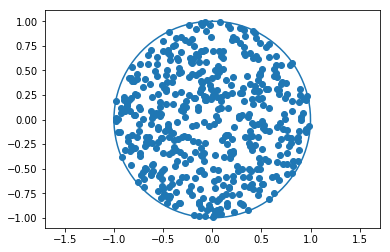

In [15]:
phi_cr, r_cr = np.asarray([2*np.pi*np.random.rand() for i in range(500)]), np.asarray([np.random.rand() for i in range(500)])

x_cr = np.sqrt(r_cr)*np.cos(phi_cr)
y_cr = np.sqrt(r_cr)*np.sin(phi_cr)

plt.scatter(x_cr, y_cr)

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

### Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

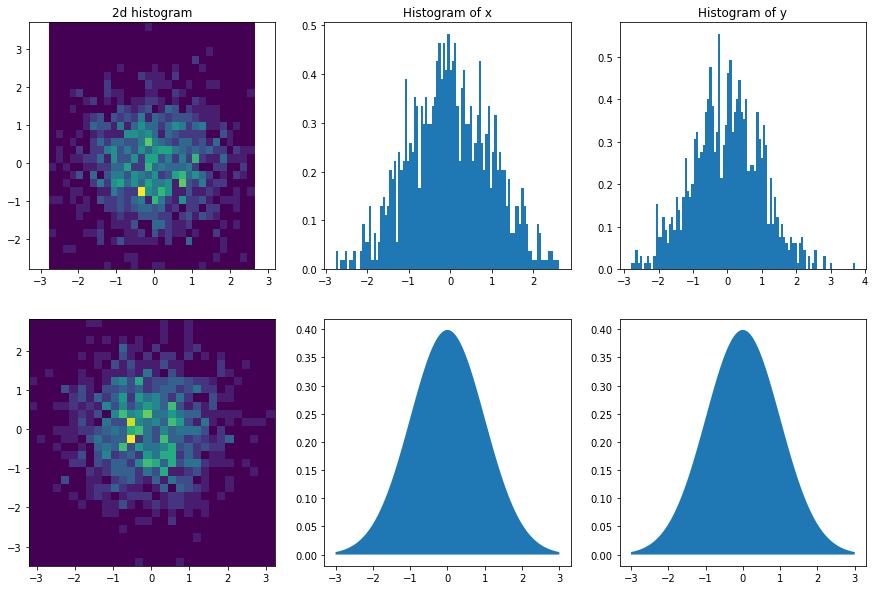

In [16]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0,0].hist2d(x, y, bins=30)
ax[0,0].axis('equal')
ax[0,1].hist(x, bins=100, density=True)
ax[0,2].hist(y, bins=100, density=True)
ax[0,0].set_title("2d histogram")
ax[0,1].set_title("Histogram of x")
ax[0,2].set_title("Histogram of y")
x_norm = np.linspace(-3, 3, 1000)
randn = [np.random.randn() for i in range(n)]
randn1 = [np.random.randn() for i in range(n)]
ax[1,0].hist2d(randn, randn1, bins=30)
ax[1,1].fill_between(x_norm, 0, stats.norm.pdf(x_norm))
ax[1,2].fill_between(x_norm, 0, stats.norm.pdf(x_norm))

plt.show()

Похоже на нормальное

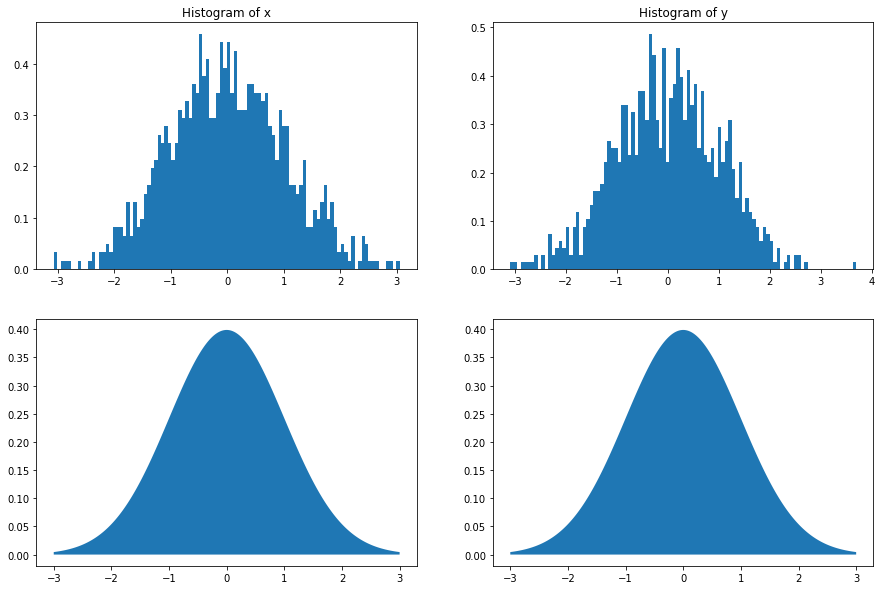

In [17]:
#Модифицированный метод
x, y = [], []
while len(x) < 1000:
    u1 = 2*np.random.rand()-1
    u2 = 2*np.random.rand()-1
    s=u1**2+u2**2
    if (s>0) & (s<=1):
        x.append(u1*np.sqrt(-2*np.log(s)/s))
        y.append(u2*np.sqrt(-2*np.log(s)/s))
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0,0].hist(x, bins=100, density=True)
ax[0,1].hist(y, bins=100, density=True)
ax[0,0].set_title("Histogram of x")
ax[0,1].set_title("Histogram of y")
x_norm = np.linspace(-3, 3, 1000)
ax[1,0].fill_between(x_norm, 0, stats.norm.pdf(x_norm))
ax[1,1].fill_between(x_norm, 0, stats.norm.pdf(x_norm))
plt.show()

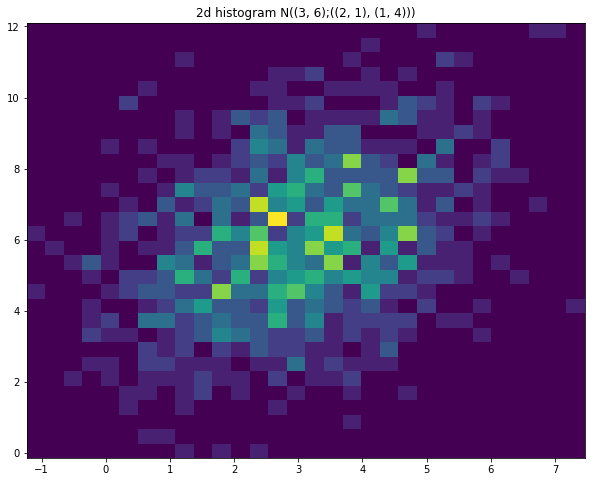

In [18]:
#Сделаю двумерное нормальное N((3, 6);((2, 1), (1, 4)))
#Поскольку наша выборка N((0,0), E), то к ней надо прибавить вектор (3,6), чтоб получить N((3,6), E).
#Чтоб получить N((3, 6);((2, 1), (1, 4))) надо найти матрицу А: А*А^T = ((2, 1), (1, 4))
#Нашел эту матрицу на черновике
x = np.asarray(x)
y = np.asarray(y)

x1 = x
x = (1/2)*x+(np.sqrt(7)/2)*y+3
y = 2*x1+6

plt.figure(figsize=(10,8))
plt.hist2d(x, y, bins=30)
plt.title("2d histogram N((3, 6);((2, 1), (1, 4)))")
plt.show()

### Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

In [47]:
def rand_walk(x_walk,y_walk):
    while (y_walk[len(y_walk)-1]!=0)|(x_walk[len(x_walk)-1]!=0):
        angle = np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2], 100)
        x_walk, y_walk = np.around(np.cos(angle)), np.around(np.sin(angle))
        x_walk, y_walk = [x_walk[:i].sum() for i in range(1,101)], [y_walk[:i].sum() for i in range(1,101)]
        return x_walk, y_walk

[-1.0, 0.0, -1.0, 0.0, -1.0, -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -1.0, -2.0, -2.0, -3.0, -2.0, -2.0, -2.0, -2.0, -2.0, -3.0, -4.0, -4.0, -4.0, -4.0, -5.0, -6.0, -6.0, -6.0, -5.0, -5.0, -6.0, -7.0, -7.0, -7.0, -7.0, -6.0, -5.0, -5.0, -6.0, -6.0, -7.0, -8.0, -8.0, -9.0, -10.0, -11.0, -11.0, -12.0, -11.0, -10.0, -10.0, -10.0, -10.0, -10.0, -9.0, -8.0, -8.0, -9.0, -8.0, -8.0, -9.0, -9.0, -9.0, -8.0, -8.0, -8.0, -9.0, -9.0, -10.0, -9.0, -10.0, -11.0, -10.0, -10.0, -11.0, -11.0, -11.0, -12.0, -12.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -10.0, -11.0, -11.0, -11.0, -10.0, -9.0, -9.0, -9.0, -9.0, -9.0, -10.0, -9.0, -9.0, -9.0]


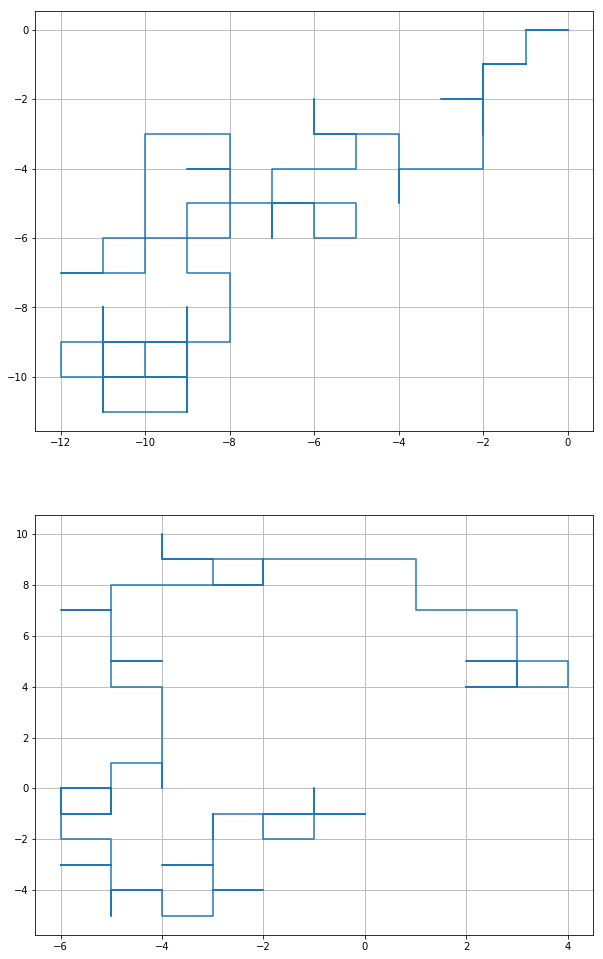

In [52]:
#Выведем два графика
x_walk, y_walk = [1], [1]
x_walk, y_walk = rand_walk(x_walk,y_walk)

print(x_walk)

plt.figure(figsize=(10,17))

plt.subplot(2,1,1)
plt.plot(x_walk,y_walk)
plt.grid()

x_walk, y_walk = [1],[1]
x_walk, y_walk = rand_walk(x_walk,y_walk)

plt.subplot(2,1,2)
plt.plot(x_walk,y_walk)
plt.grid()

plt.show()

### Практическое задание. Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [102]:
def random_partition(C, n):
    B = 0
    for k in range(1,1000):
        B+=(k**n/np.math.factorial(k))/np.exp(1)
    r = np.random.choice(np.arange(1,n+1), p=[k**n/(np.math.factorial(k)*np.exp(1)*B) for k in range(1,n+1)])
    C = np.random.choice(np.arange(1,r+1), size=n)
    return C

In [103]:
n = 100
E = 0
for i in range(1000):
    C = []
    C = random_partition(C,n)
    E+=len(np.unique(C))
E=E/1000
print(E)

28.652
